# 01 FORTRAN
## Programación en FORTRAN

Aqui montaremos nuestro Google Drive en Colab, así podemos tener todo grabado y a nuestro alcance cuando queramos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# veamos donde estamos
!pwd

/content


Cambiamos a nuestra carpeta o directorio de Trabajo
Observen que dentro del MyDrive tengo una carpeta que se llama Colab Notebooks y otra que se llama Fortran

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/Fortran

/content/drive/MyDrive/Colab Notebooks/Fortran


In [4]:
# chequeamos donde estamos
!pwd

/content/drive/MyDrive/Colab Notebooks/Fortran


In [5]:
# veamos que tenemos
! ls

01_Fortran.ipynb


Vamos a Importar una libreria para mostrar Imagenes en este Notebook

In [6]:
from IPython.display import Image

Ahora escribimos nuestro programa en Fortran que nos generará nuestro datos, preferentemente generaremos los datos de la forma [x y]

In [7]:
%%writefile dataGrapf_01.f90
!==================================================
! Copyright © 2022 My House
!
! program name : dataGrapf_01.f90
!
! Este es un programa ejemplo para generar datos que serán
!         graficados con una Script escrita en Python
!
!                           
!                 version 0.0
!                 2022/02/16
!
! SPDX-License-Identifier: Apa Che
!
!                            Edgardo BONZI
!                       edgardobonzi@gmail.com
! ==================================================

program dataGrapf
implicit none
  
   !Defino mis variables, un contador y dos variables
   integer(kind = 4) :: ii
   real(kind = 4) :: xx, yy  

do ii = -20, 20
      xx = real(ii)
      yy = xx ** 3

      print *, xx, yy
end do
      
end program dataGrapf


Writing dataGrapf_01.f90


In [8]:
! ls -lt

total 117
-rw------- 1 root root    766 Mar 19 17:27 dataGrapf_01.f90
-rw------- 1 root root 118526 Mar 19 17:27 01_Fortran.ipynb


En este siguiente paso, compilamos el programa de Fotran utilizando gfortran, que es el compilador disponible en Google Colab

In [9]:
!gfortran dataGrapf_01.f90 -o dataGrapf_01.x

Ahora, lo corremos y a como nuestro programa aún no graba datos, haremos una cañeria para guardarlo en un archivo que se llamará 'data.dat'

In [10]:
! ./dataGrapf_01.x > data.dat

Una vez generadp el archivo de datos podemos revisar si se grabó utilizando el siguiente comando

In [11]:
ls -lt

total 127
-rw------- 1 root root   1435 Mar 19 17:27 data.dat
-rwx------ 1 root root   8680 Mar 19 17:27 dataGrapf_01.x*
-rw------- 1 root root    766 Mar 19 17:27 dataGrapf_01.f90
-rw------- 1 root root 118526 Mar 19 17:27 01_Fortran.ipynb


Ahora generaremos un script en python que nos ayudará a Graficar en la nube, a este programa necesito crearlo solo una vez, luego puedo convocarlo y grafica.
Por ahora haremos que siempre lea el archivo de datos con un unico nombre 'data.dat'

In [12]:
%%writefile PlotFortran_01.py
"""
Para ver una documentacion de esta script abra el archivo "PlotFortran.py.readme"
"""
import numpy as np
import matplotlib.pyplot as plt

#path = '/content/drive/MyDrive/Fortran/Programas/'
#path = '/content/drive/MyDrive/Colab Notebooks/Fortran'
path = ''
         
Dname = "data.dat"
Gname = "gdata.png"

plt.xlabel('X Axis [a.u.]')
plt.ylabel('Y Axis [a.u.]')

Leyenda = 'Y(x)'
Titulo = "Grafico de " + Dname

DFname = path+Dname
GFname = path+Gname
data = np.loadtxt(DFname)

plt.title(Titulo)
plt.plot(data[:,0], data[:,1],'.g', label = Leyenda)
plt.legend()
plt.grid()
plt.savefig(GFname)
plt.show()

Writing PlotFortran_01.py


In [13]:
# chequeamos que se haya creado
! ls -lt

total 128
-rw------- 1 root root    609 Mar 19 17:27 PlotFortran_01.py
-rw------- 1 root root   1435 Mar 19 17:27 data.dat
-rwx------ 1 root root   8680 Mar 19 17:27 dataGrapf_01.x
-rw------- 1 root root    766 Mar 19 17:27 dataGrapf_01.f90
-rw------- 1 root root 118526 Mar 19 17:27 01_Fortran.ipynb


Ahora ejecutaremos la script escrita en Python, para generar el archivo gráfico

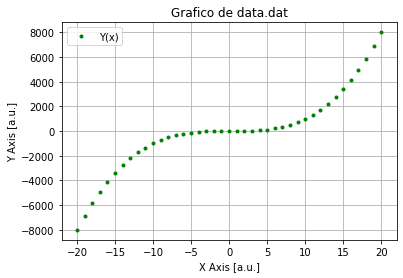

In [14]:
%run PlotFortran_01.py

Una vez generado el archivo del grafico, puedo verlo de la siguiente forma

In [16]:
# veamos que se haya creado el archivo 'gdata.png'
# luego puedo hacer un rename y cambiarle el nombre
! ls -lt

total 140
-rw------- 1 root root 115360 Mar 19 17:28 01_Fortran.ipynb
-rw------- 1 root root  14688 Mar 19 17:27 gdata.png
-rw------- 1 root root    609 Mar 19 17:27 PlotFortran_01.py
-rw------- 1 root root   1435 Mar 19 17:27 data.dat
-rwx------ 1 root root   8680 Mar 19 17:27 dataGrapf_01.x
-rw------- 1 root root    766 Mar 19 17:27 dataGrapf_01.f90


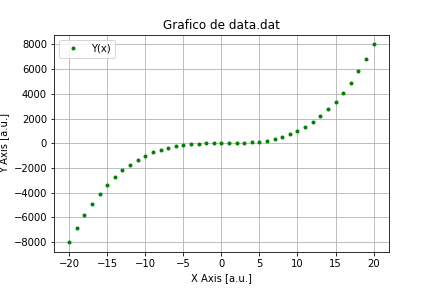

In [17]:
Image('gdata.png')

Ahora generaremos otro programa de Fortran que genere un archivo de datos con 3 columnas

In [18]:
%%writefile dataGrapf_02.f90
!==================================================
! Copyright © 2022 My House
!
! program name : dataGrapf_02.f90
!
! Este es un programa ejemplo para generar datos que serán
!         graficados con una Script escrita en Python
!         para un gráfico con tres columnas
!
!                           
!                 version 0.0
!                 2022/02/16
!
! SPDX-License-Identifier: Apa Che
!
!                            Edgardo BONZI
!                       edgardobonzi@gmail.com
! ==================================================

program dataGrapf
implicit none
  
   !Defino mis variables, un contador y dos variables
   integer(kind = 4) :: ii
   real(kind = 4) :: xx =-10.0D0, yy, dPi, zz

dPi = 3.14159/41
do ii = -100, 300
      xx = xx + dPi
      yy = sin(xx)/xx
      zz = cos(xx)

      print *, xx, yy, zz
end do
   
end program dataGrapf


Writing dataGrapf_02.f90


Compilamos

In [19]:
!gfortran dataGrapf_02.f90 -o dataGrapf_02.x

lo ejecutamos

In [20]:
# le cambié de nombre a los datos
! ./dataGrapf_02.x > data_02.dat

y ahora generamos un script de Python que grafique dos columnas 

In [21]:
%%writefile PlotFortran_02.py
"""
Para ver una documentacion de esta script abra el archivo "PlotFortran.py.readme"
"""
import numpy as np
import matplotlib.pyplot as plt

#path = '/content/drive/MyDrive/Fortran/Programas/'
#path = '/content/drive/MyDrive/Colab Notebooks/Fortran'
path = ''
         
Dname = "data_02.dat"
Gname = "gdata_02.png"

plt.xlabel('X Axis [a.u.]')
plt.ylabel('Y Axis [a.u.]')

Leyenda = 'Y(x)'
Titulo = "Grafico de " + Dname

DFname = path+Dname
GFname = path+Gname
data = np.loadtxt(DFname)

plt.title(Titulo)
plt.plot(data[:,0], data[:,1],'.g', data[:,0], data[:,2],'.b', label = Leyenda)
plt.legend()
plt.grid()
plt.savefig(GFname)
plt.show()

Writing PlotFortran_02.py


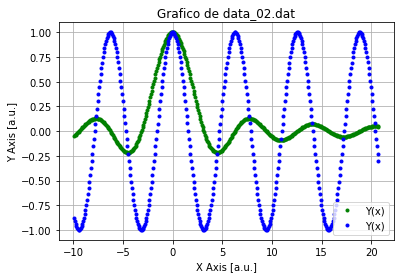

In [22]:
%run PlotFortran_02.py

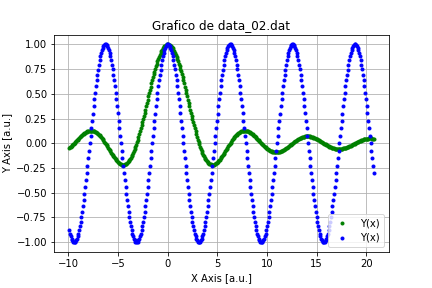

In [23]:
# muestro la imagen directamente
Image('gdata_02.png')

In [25]:
% ls -l

total 195
-rw------- 1 root root 115085 Mar 19 17:28 01_Fortran.ipynb
-rw------- 1 root root  20852 Mar 19 17:28 data_02.dat
-rw------- 1 root root   1435 Mar 19 17:27 data.dat
-rw------- 1 root root    766 Mar 19 17:27 dataGrapf_01.f90
-rwx------ 1 root root   8680 Mar 19 17:27 dataGrapf_01.x*
-rw------- 1 root root    869 Mar 19 17:28 dataGrapf_02.f90
-rwx------ 1 root root   8744 Mar 19 17:28 dataGrapf_02.x*
-rw------- 1 root root  24328 Mar 19 17:28 gdata_02.png
-rw------- 1 root root  14688 Mar 19 17:27 gdata.png
-rw------- 1 root root    609 Mar 19 17:27 PlotFortran_01.py
-rw------- 1 root root    642 Mar 19 17:28 PlotFortran_02.py
